We have a data of time versus the customers decision to buy a product.In this kernel we will be using Keras to classify the data.If you like the kernel please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/user_visit_duration.csv


### Importing Data

In [2]:
df = pd.read_csv('../input/user_visit_duration.csv')
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


In the data we have the time for which the customer browsed the website and the out come to buy a produce.

### Scatter Plot

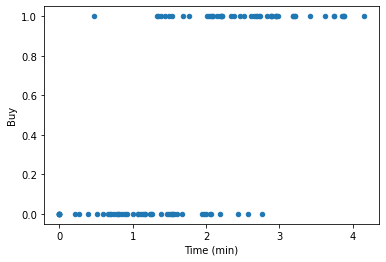

In [3]:
df.plot(kind='scatter',x='Time (min)',y='Buy');

O- Customer Didnt Buy the Product 

1 - Customer Brought the Product.

We have to build a machine learning algorithm which can calssify our customers correctly based on the time they spend on the website.We will be using Keras to build or machine learning model.

### CLassification

In [4]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import Adam,SGD

Using TensorFlow backend.


In [5]:
model = Sequential()
model.add(Dense(1,input_shape =(1,),activation='sigmoid'))

In [6]:
model.compile(SGD(lr=0.5),'binary_crossentropy',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


So Model has one hidden layer. 2 parameters that is wight and Bias.

In [8]:
X = df[['Time (min)']].values
y = df['Buy'].values
model.fit(X,y,epochs =25)

Epoch 1/25
100/100 [==============================] - 0s 3ms/step - loss: 1.1637 - accuracy: 0.4100
Epoch 2/25
100/100 [==============================] - 0s 79us/step - loss: 0.6675 - accuracy: 0.5000
Epoch 3/25
100/100 [==============================] - 0s 77us/step - loss: 0.6102 - accuracy: 0.6200
Epoch 4/25
100/100 [==============================] - 0s 78us/step - loss: 0.5934 - accuracy: 0.6200
Epoch 5/25
100/100 [==============================] - 0s 88us/step - loss: 0.5476 - accuracy: 0.7600
Epoch 6/25
100/100 [==============================] - 0s 76us/step - loss: 0.5562 - accuracy: 0.7000
Epoch 7/25
100/100 [==============================] - 0s 74us/step - loss: 0.5226 - accuracy: 0.7500
Epoch 8/25
100/100 [==============================] - 0s 70us/step - loss: 0.5034 - accuracy: 0.8000
Epoch 9/25
100/100 [==============================] - 0s 72us/step - loss: 0.4861 - accuracy: 0.7900
Epoch 10/25
100/100 [==============================] - 0s 74us/step - loss: 0.4860 - accurac

### Plotting the Predictions

Now we wil give linearspace value between 0,4 (X value) and try to predict the value of y using our model.So we will plot the actual value with the predicted value for better representation.

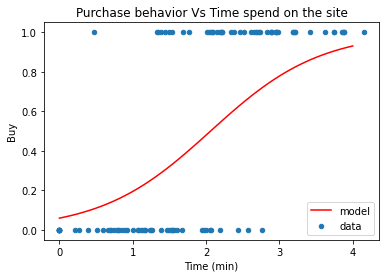

In [9]:
import matplotlib.pyplot as plt
ax = df.plot(kind = 'scatter',x = 'Time (min)',y='Buy',
             title ='Purchase behavior Vs Time spend on the site')
temp = np.linspace(0,4)
ax.plot(temp,model.predict(temp),color='red')
plt.legend(['model','data']);

Now we can see from the above plot that blue dots represnt the actual data and red line represent the output predicted by the machine learning algorithm.The output from the machine learning algorithm is probability of a customer buying a product.Now to convert the probabilities into purchasing decision we need to define a threshod to our machine learning algorithm.

In [10]:
temp_class = model.predict(temp) >0.5

### Predicting the Classification with actual outcomes

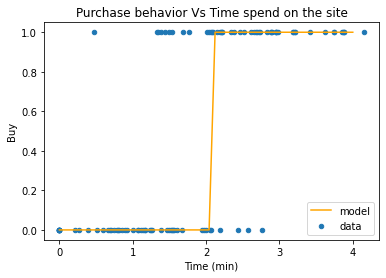

In [11]:
import matplotlib.pyplot as plt
ax = df.plot(kind = 'scatter',x = 'Time (min)',y='Buy',
             title ='Purchase behavior Vs Time spend on the site')
temp = np.linspace(0,4)
ax.plot(temp,temp_class,color='orange')
plt.legend(['model','data']);

Plot shows the predictions made by the machine learning model based on a threshold of 0.5

### Accuracy of the Model

In [12]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
print('The accuracy score is {:0.3f}'.format(accuracy_score(y,y_class_pred)))

The accuracy score is 0.840


So for this model we have an accuracy score of 81%.It is fairly good value considering the nature of the dataset.If changes the threshold value there is possibility of improving accuracy score.

### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [16]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [17]:
#print('The Accuracy score is {:0.3f}'.format(accuracy_score(y,y_class_pred)))

In [18]:
model.fit(X_train,y_train,epochs =25,verbose = 0)

In [19]:
print('The Accuracy score is {:0.3f}'.format(accuracy_score(y_train,model.predict(X_train)>0.5)))
print('The Accuracy score is {:0.3f}'.format(accuracy_score(y_test,model.predict(X_test)>0.5)))

The Accuracy score is 0.825
The Accuracy score is 0.850


### Cross Validation

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier

In [21]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1,input_shape=(1,),activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                 'binary_crossentropy',
                 metrics = ['accuracy'])
    return model

In [22]:
model = KerasClassifier(build_fn = build_logistic_regression_model,epochs = 25 )

In [23]:
from sklearn.model_selection import cross_val_score, KFold

In [24]:
cv = KFold(3,shuffle = True)
scores = cross_val_score(model,X,y,cv=cv)

Epoch 1/25
66/66 [==============================] - 0s 1ms/step - loss: 0.7235 - accuracy: 0.5909
Epoch 2/25
66/66 [==============================] - 0s 88us/step - loss: 0.5689 - accuracy: 0.6515
Epoch 3/25
66/66 [==============================] - 0s 86us/step - loss: 0.5334 - accuracy: 0.7273
Epoch 4/25
66/66 [==============================] - 0s 94us/step - loss: 0.5190 - accuracy: 0.7273
Epoch 5/25
66/66 [==============================] - 0s 95us/step - loss: 0.4964 - accuracy: 0.8333
Epoch 6/25
66/66 [==============================] - 0s 84us/step - loss: 0.5266 - accuracy: 0.7121
Epoch 7/25
66/66 [==============================] - 0s 86us/step - loss: 0.5111 - accuracy: 0.7273
Epoch 8/25
66/66 [==============================] - 0s 90us/step - loss: 0.5144 - accuracy: 0.7273
Epoch 9/25
66/66 [==============================] - 0s 87us/step - loss: 0.4803 - accuracy: 0.7727
Epoch 10/25
66/66 [==============================] - 0s 104us/step - loss: 0.4644 - accuracy: 0.8030
Epoch 11/

In [25]:
scores

array([0.70588237, 0.78787881, 0.84848487])

In [26]:
print('The cross validation accuracy is {:0.4f} ± {:0.4f}'.format(scores.mean(),scores.std()))

The cross validation accuracy is 0.7807 ± 0.0584


So after doing 3 fold corss validation we can say that the accuracy of our model is 77.04 % with a standard deviation of 0.035.

### Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y,y_class_pred)

array([[45,  5],
       [11, 39]])

In [29]:
def pretty_confusion_matrix(y_true,y_pred,labels =["False","True"]):
    cm = confusion_matrix(y_true,y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm,index = labels,columns = pred_labels)
    return df

In [30]:
pretty_confusion_matrix(y,y_class_pred,['Not Buy','Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,45,5
Buy,11,39


In [31]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [32]:
print('Precision:\t{:0.3f}'.format(precision_score(y,y_class_pred)))
print('Recall:   \t{:0.3f}'.format(recall_score(y,y_class_pred)))
print('F1 score: \t{:0.3f}'.format(f1_score(y,y_class_pred)))

Precision:	0.886
Recall:   	0.780
F1 score: 	0.830


In [33]:
from sklearn.metrics import classification_report 

In [34]:
print(classification_report(y,y_class_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85        50
           1       0.89      0.78      0.83        50

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

